In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df_train = pd.read_csv("/content/Titanic_train.csv")

In [4]:
# Exploratory Data Analysis
print("## Data Exploration")
df_train.head()


## Data Exploration


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<function matplotlib.pyplot.show(close=None, block=None)>

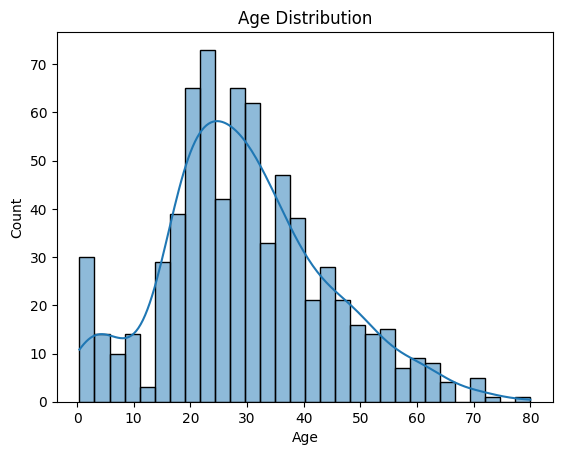

In [7]:
# Visualizations
sns.histplot(df_train['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show

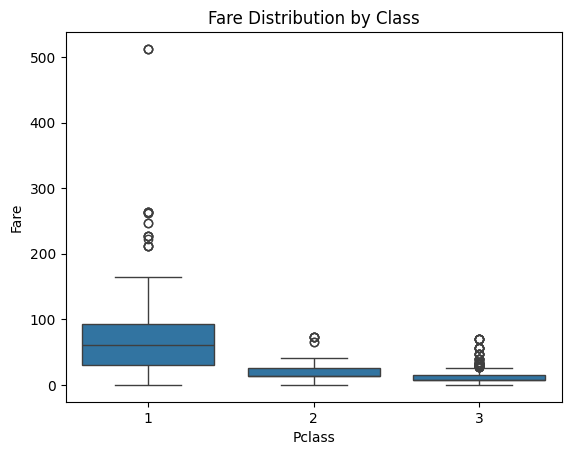

In [8]:
sns.boxplot(x=df_train['Pclass'], y=df_train['Fare'])
plt.title("Fare Distribution by Class")
plt.show()

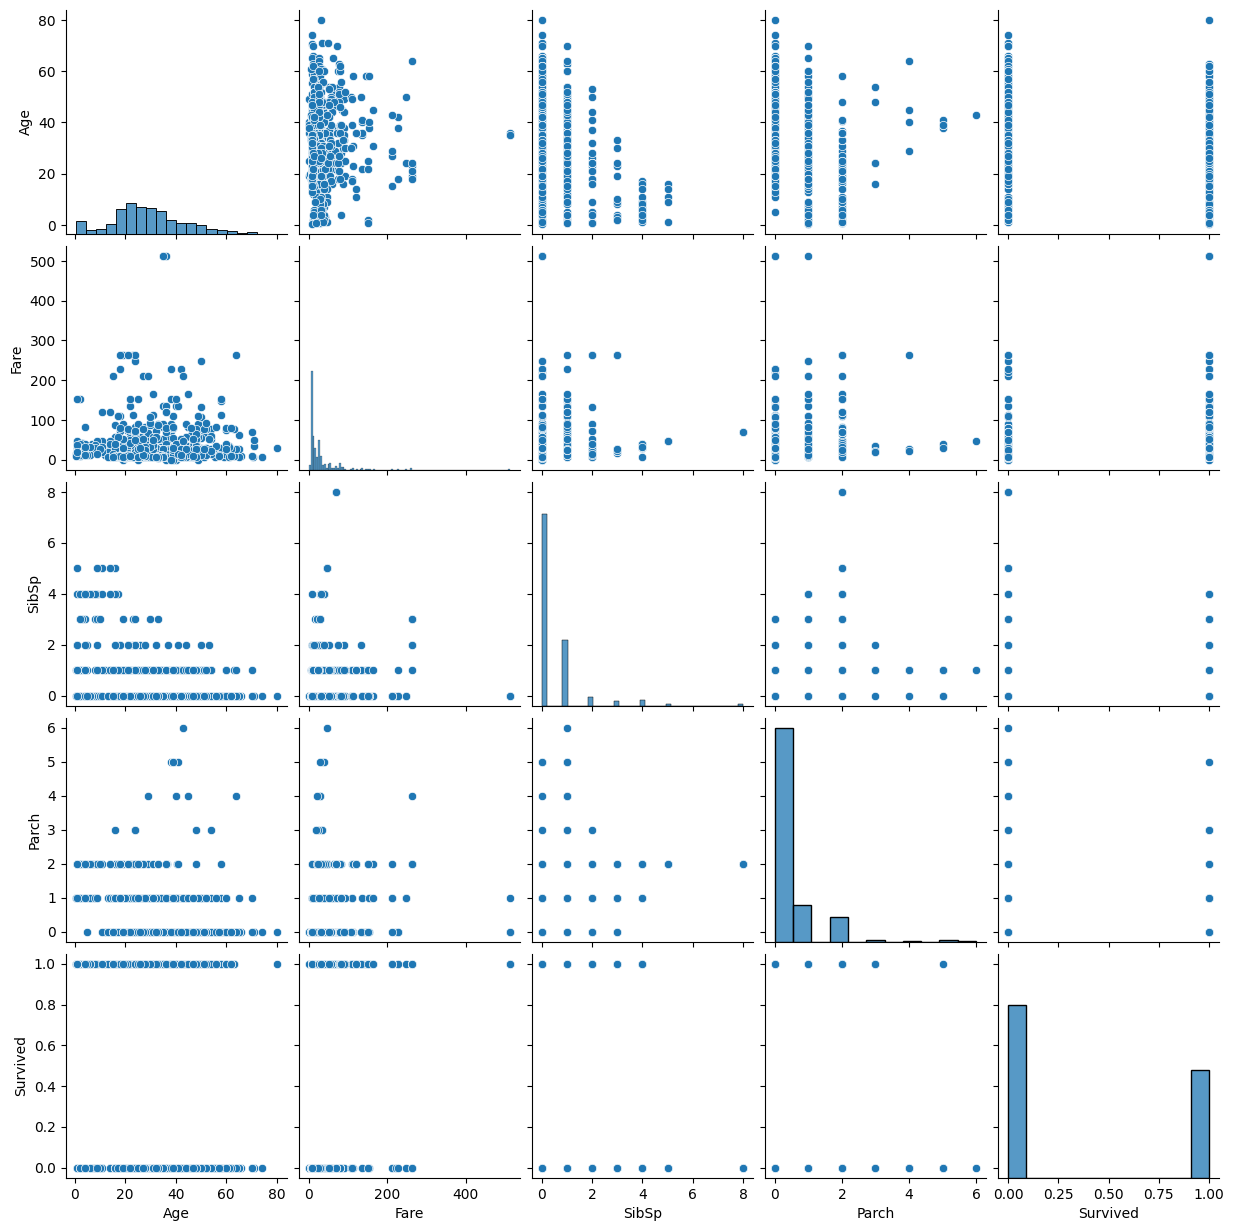

In [9]:
sns.pairplot(df_train[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']])
plt.show()

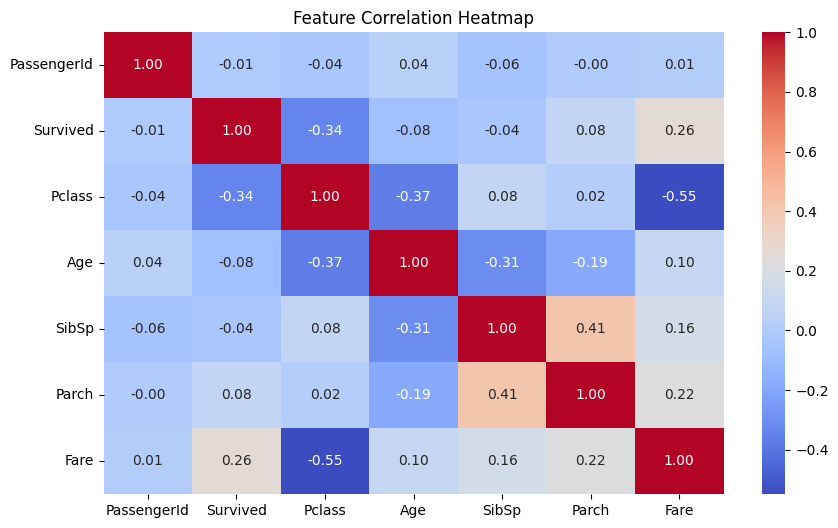

In [11]:
# Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df_train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [13]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_train.drop(columns=['Cabin'], inplace=True)

<ipython-input-13-2ab7246188de>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)


In [16]:
# Encoding categorical variables
label_encoder = LabelEncoder()
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])

print("Data preprocessing completed.")

Data preprocessing completed.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [18]:
# Selecting features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_train[features]
y = df_train['Survived']

In [19]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Model Building
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [24]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC Score: 0.8001930501930502


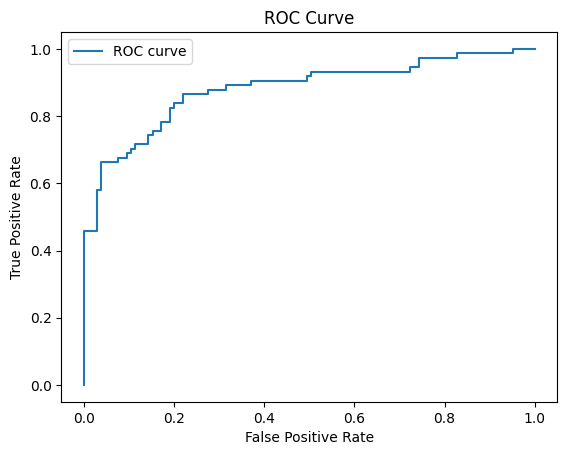

In [25]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [26]:
# Testing Dataset / Model Evaluation
titanic_test = pd.read_csv('/content/Titanic_test.csv')

In [27]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [29]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [30]:
titanic_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [31]:
titanic_test["Embarked"].value_counts()

,count
Embarked,
S,270
C,102
Q,46


In [32]:
titanic_test["Sex"].value_counts()

,count
Sex,
male,266
female,152


In [33]:
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)

<ipython-input-33-e2eefaee25c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)


In [34]:
titanic_test.drop(columns=["PassengerId", "Cabin", "Ticket", "Name"], inplace = True)

In [35]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [36]:
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

In [37]:
titanic_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


In [38]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_male    418 non-null    bool   
 6   Embarked_Q  418 non-null    bool   
 7   Embarked_S  418 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 17.7 KB


In [39]:
titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace = True)

<ipython-input-39-916dc8f015f1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_test['Fare'].fillna(titanic_test['Fare'].median(), inplace = True)


In [52]:
def preprocess_data(df):
    # Handling missing values
    imputer = SimpleImputer(strategy='mean')
    df['Age'] = imputer.fit_transform(df[['Age']])
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Fill missing Fare

    df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True, errors='ignore')


    label_encoder = LabelEncoder()
    df['Sex'] = label_encoder.fit_transform(df['Sex'])
    df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

    return df

df_train = pd.read_csv("/content/Titanic_train.csv")
titanic_test = pd.read_csv('/content/Titanic_test.csv')

df_train = preprocess_data(df_train)
titanic_test = preprocess_data(titanic_test)


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df_train[features]
y = df_train['Survived']


# Prediction on the test set
predictions = model.predict(titanic_test[features])


<ipython-input-52-44ea689dfaaf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
<ipython-input-52-44ea689dfaaf>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [53]:
model.predict(titanic_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [54]:
pd.Series(model.predict(titanic_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [55]:
titanic_test['Servived'] = pd.Series(model.predict(titanic_test))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [56]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Servived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,0


In [58]:
titanic_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Servived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,0


## Streamlit App Deployment

In [60]:

!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [61]:
import streamlit as st

In [69]:
def main():
    st.title("Titanic Survival Prediction")
    st.write("Enter passenger details to predict survival.")

    # User inputs
    pclass = st.selectbox("Passenger Class", [1, 2, 3])
    sex = st.radio("Sex", ["Male", "Female"])
    age = st.slider("Age", 1, 100, 25)
    sibsp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
    parch = st.number_input("Parents/Children Aboard", 0, 10, 0)
    fare = st.number_input("Fare", 0.0, 500.0, 50.0)
    embarked = st.selectbox("Embarked Port", ["C", "Q", "S"])


In [70]:
if st.button("Predict Survival"):
        user_data = pd.DataFrame([[pclass, 1 if sex == "Male" else 0, age, sibsp, parch, fare,
                                   1 if embarked == "Q" else 0, 1 if embarked == "S" else 0]],
                                 columns=X.columns)
        user_data = scaler.transform(user_data)
        prediction = model.predict(user_data)
        st.write("Survived" if prediction[0] == 1 else "Did Not Survive")

if __name__ == "__main__":
    main()

2025-02-21 06:57:08.055 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 06:57:08.064 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 06:57:08.067 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 06:57:08.070 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-21 06:57:08.275 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-21 06:57:08.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when 

# Interview Questions:


In [ ]:
##1. What is the difference between precision and recall?

Precision and recall are two important metrics used to evaluate the performance of classification models, particularly in scenarios where the classes are imbalanced.

1. **Precision**: This measures the accuracy of the positive predictions made by the model. Specifically, it is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). In formula terms:

   \[
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
   \]

   Precision tells us how many of the predicted positive instances are actually positive. High precision means that when the model predicts a positive outcome, it is likely correct.

2. **Recall**: Also known as sensitivity or true positive rate, recall measures how well the model identifies all the actual positive instances. It is the ratio of true positive predictions to the total number of actual positives (both true positives and false negatives). In formula terms:

   \[
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
   \]

   Recall tells us how many of the actual positive instances were correctly identified by the model. High recall means that the model is good at capturing most of the positive cases.

**In summary:**

- **Precision** is about the quality of positive predictions. It answers the question: "Of all the positive predictions, how many were actually positive?"
- **Recall** is about the completeness of positive predictions. It answers the question: "Of all the actual positives, how many were identified by the model?"

A model with high precision and high recall is ideal, but in practice, there is often a trade-off between the two. For example, increasing precision typically decreases recall and vice versa.

In [ ]:
## 2.What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique used in statistical modeling and machine learning to assess how well a model generalizes to an independent dataset. It involves partitioning the dataset into multiple subsets or folds, training the model on some of these folds, and evaluating it on the remaining folds. This process helps in obtaining a more reliable estimate of the model’s performance compared to using a single train-test split.

**Here's how cross-validation generally works:**

1. **Partitioning the Data**: The dataset is divided into \( k \) subsets or folds (commonly 5 or 10).

2. **Training and Testing**: For each fold:
   - The model is trained on \( k-1 \) folds (the training set).
   - The remaining fold is used as the test set to evaluate the model’s performance.

3. **Repeating**: This process is repeated \( k \) times, with each fold being used as the test set exactly once.

4. **Aggregating Results**: The performance metrics (such as accuracy, precision, recall, etc.) are averaged over all \( k \) folds to provide a final estimate of the model’s performance.

**Importance of Cross-Validation in Binary Classification:**

1. **More Reliable Performance Estimates**: By evaluating the model on multiple subsets of data, cross-validation provides a more robust estimate of how the model will perform on unseen data. It reduces the risk of overfitting to a particular train-test split.

2. **Efficient Use of Data**: In cases where the dataset is small, cross-validation helps to make the most of the available data by using each data point for both training and testing. This can lead to better utilization of the dataset and a more reliable assessment.

3. **Model Selection and Tuning**: Cross-validation helps in selecting the best model and hyperparameters by providing a way to compare different models or configurations based on their average performance across the folds. It helps in understanding how changes in model parameters impact performance.

4. **Detecting Variability**: Cross-validation helps in understanding the variability in model performance across different subsets of the data. This can reveal whether the model's performance is consistent or if it varies significantly based on the specific data it was trained and tested on.

5. **Avoiding Data Leakage**: Proper cross-validation ensures that the test set is independent of the training data, which helps in avoiding data leakage and provides a more accurate measure of model performance.

**Common Types of Cross-Validation:**

- **K-Fold Cross-Validation**: As described, where the dataset is divided into \( k \) folds.
- **Leave-One-Out Cross-Validation (LOOCV)**: A special case of \( k \)-fold cross-validation where \( k \) equals the number of data points, meaning each fold consists of a single data point as the test set.
- **Stratified K-Fold Cross-Validation**: A variation where the folds are made to maintain the proportion of each class, which is particularly useful for imbalanced datasets.

In binary classification, cross-validation helps ensure that the model's performance metrics (like precision, recall, and F1 score) are reliable and not just artifacts of a particular train-test split.